In [20]:
!pip install tweepy numpy pandas matplotlib

  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp310-cp310-win

In [226]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

1.Get Tweets(From local dataset)

In [229]:
df = pd.read_csv('hashtag_joebiden.csv')

C:\Users\Dala\AppData\Local\Temp\ipykernel_13176\203075518.py:1: DtypeWarning: Columns (1,3,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hashtag_joebiden.csv')


In [26]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [28]:
df.describe()

,retweet_count,lat,long
count,2.675220e+05,132999.000000,132999.000000
mean,1.410976e+03,36.773048,-64.789834
std,7.284035e+05,14.546631,58.921762
min,0.000000e+00,-79.406307,-161.755833
25%,0.000000e+00,33.843941,-100.445882
50%,0.000000e+00,39.783730,-81.463983
75%,0.000000e+00,41.921673,-71.599237
max,3.767487e+08,90.000000,179.048837


In [30]:
df.dtypes

created_at               object
tweet_id                 object
tweet                    object
likes                    object
retweet_count           float64
source                   object
user_id                  object
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count     object
user_location            object
lat                     float64
long                    float64
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at             object
dtype: object

2.Preprocess

In [235]:


date_format = "%Y-%m-%d %H:%M:%S"
date_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'

extracted_dates = []
for date_str in df['created_at']:
    matches = re.findall(date_pattern, date_str)
    if matches:
        extracted_dates.append(matches[0])
    else:
        extracted_dates.append(None)
        
timestamps = pd.to_datetime(extracted_dates, format=date_format, errors='coerce')
df['timestamp'] = timestamps
columns_to_keep = ['timestamp', 'tweet']
df = df[columns_to_keep]
df.head()
# output_file = 'Tidy_file.csv'
# df.to_csv(output_file, index=False)
# print(f"combined file save to: {output_file}")

,timestamp,tweet
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...


In [35]:
df.tail()

,created_at,tweet
267632,2020-10-31 23:57:03,"HE'S SPREADING DIVISION, AND ADDITION!! 🤣\n\n#..."
267633,2020-10-31 23:57:05,@MSNBC @maddow Emails released from Hunter #Bi...
267634,2020-10-31 23:57:06,#Biden #BidenCrimeFamiIy #BidenHarris Join the...
267635,2020-10-31 23:57:15,ستشهد أمريكا أحداث غير مسبوقة وارد جداً نزول ا...
267636,2020-10-31 23:57:15,the tartuffe #TRUMP ? \n@breitbartnews\n @stev...


In [37]:
df.shape

(267637, 2)

In [43]:
df.loc[10000]

created_at                                  2020-10-15 16:27:59
tweet         @Jim_Jordan @JudiciaryGOP Where is \nfreedom o...
Name: 10000, dtype: object

In [275]:
sampled_df = df.sample(n=1000) # sample is unsorted, instead of randomly.
sampled_df = sampled_df.reset_index(drop=True)

In [239]:
sampled_df.loc[5000]

timestamp                                  2020-10-24 04:04:30
tweet        Whereas #Trump tries to push #KimJongUn into s...
Name: 5000, dtype: object

In [241]:
sampled_df.shape

(10000, 2)

In [243]:
sampled_df.dtypes

timestamp    datetime64[ns]
tweet                object
dtype: object

In [277]:
trump_refs = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_refs = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [279]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if str(tweet).find(ref) !=-1:
            flag = 1
    return flag

sampled_df['Trump'] = sampled_df['tweet'].apply(lambda x: identify_subject(x, trump_refs))
sampled_df['Biden'] = sampled_df['tweet'].apply(lambda x: identify_subject(x, biden_refs))

In [281]:
sampled_df[sampled_df['Biden'] == 1]

,timestamp,tweet,Trump,Biden
0,2020-10-28 02:23:38,@latimes #coronavirus cases will “rise” even h...,0,1
1,2020-10-17 00:32:48,Biden's Teleprompter. https://t.co/AqW9zeJWJE ...,0,1
2,2020-10-15 17:27:59,"#JoeBiden, &amp; now #KamalaHarris with her hu...",1,1
3,2020-10-27 09:30:13,#Biden – an #Amtrak evangelist – could be a li...,0,1
4,2020-10-28 21:15:55,PÅ TURNÉ • Med mindre än en vecka kvar till va...,1,1
...,...,...,...,...
995,2020-10-21 16:14:04,"""Last night I was called a f**got and told tha...",0,1
996,2020-10-26 23:31:20,@BidensLaptopp @JoeConchaTV At his rallies whe...,1,1
997,2020-10-15 02:36:14,#UPDATE #Election2020 \n#Florida\n\n#Biden: 50...,1,1
998,2020-10-29 01:24:20,If you are voting on character how can you vot...,0,1


In [85]:
!pip install nltk

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.4 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [87]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00


In [283]:
import nltk
print(nltk.data.path)
from nltk.corpus import stopwords

from textblob import Word, TextBlob
from nltk.stem import WordNetLemmatizer


['C:\\Users\\Dala/nltk_data', 'C:\\Users\\Dala\\anaconda3\\envs\\sentiment_analysis\\nltk_data', 'C:\\Users\\Dala\\anaconda3\\envs\\sentiment_analysis\\share\\nltk_data', 'C:\\Users\\Dala\\anaconda3\\envs\\sentiment_analysis\\lib\\nltk_data', 'C:\\Users\\Dala\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [285]:
# nltk.download('stopwords')
# nltk.download('wordnet')
stop_word = stopwords.words('english')
custom_stopwords = ['RT'] # retweet 转发推文
lemmatizer = WordNetLemmatizer()

In [287]:
def preprocess_tweets(tweet, custom_stopwords):
    if not isinstance(tweet, str):
        tweet = str(tweet) 
    # preprocessed_tweet = tweet
    # preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = re.sub(r'[^\w\s]', '', tweet)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_word)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    # preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    preprocessed_tweet = " ".join(lemmatizer.lemmatize(word) for word in preprocessed_tweet.split())
    return preprocessed_tweet

sampled_df['Processed Tweet'] = sampled_df['tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
sampled_df.head()

,timestamp,tweet,Trump,Biden,Processed Tweet
0,2020-10-28 02:23:38,@latimes #coronavirus cases will “rise” even h...,0,1,latimes coronavirus case rise even higher sinc...
1,2020-10-17 00:32:48,Biden's Teleprompter. https://t.co/AqW9zeJWJE ...,0,1,Bidens Teleprompter httpstcoAqW9zeJWJE través ...
2,2020-10-15 17:27:59,"#JoeBiden, &amp; now #KamalaHarris with her hu...",1,1,JoeBiden amp KamalaHarris husband tie CCP come...
3,2020-10-27 09:30:13,#Biden – an #Amtrak evangelist – could be a li...,0,1,Biden Amtrak evangelist could lifeline rail ag...
4,2020-10-28 21:15:55,PÅ TURNÉ • Med mindre än en vecka kvar till va...,1,1,PÅ TURNÉ Med mindre än en vecka kvar till vald...


3.Caculate Sentiment

In [290]:
sampled_df['polarity'] = sampled_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
sampled_df['subjectivity'] = sampled_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [292]:
sampled_df.head()

,timestamp,tweet,Trump,Biden,Processed Tweet,polarity,subjectivity
0,2020-10-28 02:23:38,@latimes #coronavirus cases will “rise” even h...,0,1,latimes coronavirus case rise even higher sinc...,0.25,0.500
1,2020-10-17 00:32:48,Biden's Teleprompter. https://t.co/AqW9zeJWJE ...,0,1,Bidens Teleprompter httpstcoAqW9zeJWJE través ...,0.00,0.000
2,2020-10-15 17:27:59,"#JoeBiden, &amp; now #KamalaHarris with her hu...",1,1,JoeBiden amp KamalaHarris husband tie CCP come...,0.00,0.375
3,2020-10-27 09:30:13,#Biden – an #Amtrak evangelist – could be a li...,0,1,Biden Amtrak evangelist could lifeline rail ag...,0.00,0.000
4,2020-10-28 21:15:55,PÅ TURNÉ • Med mindre än en vecka kvar till va...,1,1,PÅ TURNÉ Med mindre än en vecka kvar till vald...,0.00,0.000


In [294]:
# display 并非 Python 的内置函数，它来自于 IPython.display 模块
display(sampled_df[sampled_df['Trump'] == 1][['Trump', 'polarity', 'subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
sampled_df[sampled_df['Biden'] == 1][['Biden', 'polarity', 'subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])

C:\Users\Dala\AppData\Local\Temp\ipykernel_13176\2259982806.py:2: FutureWarning: The provided callable <function mean at 0x00000293D2D51000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  display(sampled_df[sampled_df['Trump'] == 1][['Trump', 'polarity', 'subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
C:\Users\Dala\AppData\Local\Temp\ipykernel_13176\2259982806.py:2: FutureWarning: The provided callable <function max at 0x00000293D2D50700> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  display(sampled_df[sampled_df['Trump'] == 1][['Trump', 'polarity', 'subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
C:\Users\Dala\AppData\Local\Temp\ipykernel_13176\2259982806.py:2: FutureWarning: The 

polarity                  subjectivity                 
           mean  max  min median         mean  max  min median
Trump                                                         
1      0.031739  0.8 -1.0    0.0     0.321771  1.0  0.0    0.3

C:\Users\Dala\AppData\Local\Temp\ipykernel_13176\2259982806.py:3: FutureWarning: The provided callable <function mean at 0x00000293D2D51000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sampled_df[sampled_df['Biden'] == 1][['Biden', 'polarity', 'subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])
C:\Users\Dala\AppData\Local\Temp\ipykernel_13176\2259982806.py:3: FutureWarning: The provided callable <function max at 0x00000293D2D50700> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sampled_df[sampled_df['Biden'] == 1][['Biden', 'polarity', 'subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])
C:\Users\Dala\AppData\Local\Temp\ipykernel_13176\2259982806.py:3: FutureWarning: The provided callable 

polarity                  subjectivity                 
           mean  max  min median         mean  max  min median
Biden                                                         
1      0.038274  1.0 -1.0    0.0     0.289526  1.0  0.0    0.2

4.Visualise

In [297]:

biden = sampled_df[sampled_df['Biden']==1][['timestamp', 'polarity']]
biden = biden.sort_values(by='timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = sampled_df[sampled_df['Trump']==1][['timestamp', 'polarity']]
trump = trump.sort_values(by='timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

In [299]:
trump.head()

,timestamp,polarity,MA Polarity
253,2020-10-15 00:25:31,0.500000,NaN
200,2020-10-15 01:10:23,0.000000,NaN
515,2020-10-15 01:34:24,-0.045833,0.151389
997,2020-10-15 02:36:14,0.000000,0.113542
851,2020-10-15 04:48:08,0.100000,0.110833


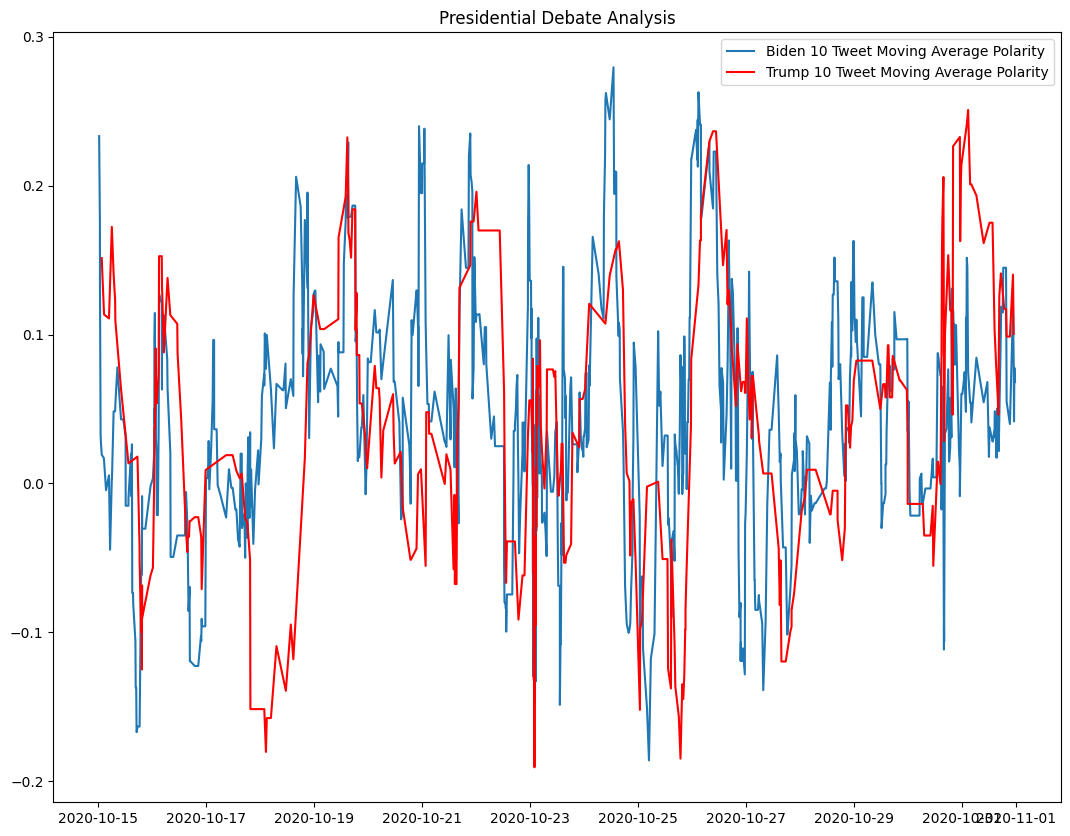

In [305]:
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(biden['timestamp'], biden['MA Polarity'], label='Biden 10 Tweet Moving Average Polarity')
ax.plot(trump['timestamp'], trump['MA Polarity'], color='red', label='Trump 10 Tweet Moving Average Polarity')
ax.set_title('Presidential Debate Analysis')
ax.legend()
plt.show()